<a href="https://colab.research.google.com/github/Stepeech/DataMining/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%968_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №8. Random forest**

# Задание 1. Обучите классификатор Random Forest для решения задачи бинарной классификации: для каждого человека научиться предсказывать, выживет ли он при крушении Титаника.

Ссылка на датасет: https://www.kaggle.com/c/titanic/data

## 1. Устанавливаем зависимости

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## 2. Импортируем датасет

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Производим разведовательный анализ данных


Получим представление о данных в датасете:

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


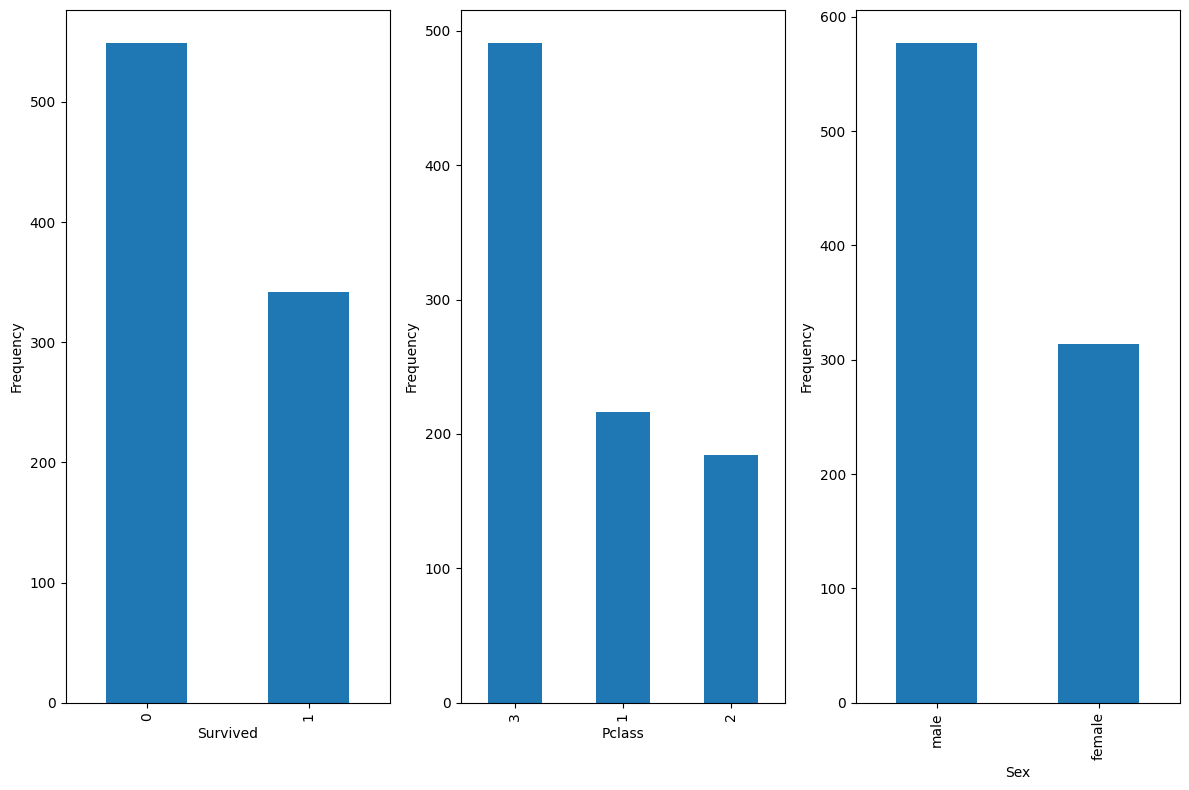

In [5]:
col_names = ['Survived', 'Pclass', 'Sex']

fig, axs = plt.subplots(1, 3, figsize=(12, 8))

for i, col in enumerate(col_names):
    ax = axs[i]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Сформируем обучающую и тестовую выборки:


In [65]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
X_numeric = X.drop(non_numeric_columns, axis=1)

X_numeric.fillna(X_numeric.median(), inplace=True)

X_filled = pd.concat([X_numeric, X[non_numeric_columns]], axis=1)
X_filled = pd.get_dummies(X_filled)

X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=1)

## 6. Построение базовой модели:

In [66]:
rfс = RandomForestClassifier(random_state=1)
rfс.fit(X_train, y_train)

y_pred = rfс.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.7877094972067039


In [67]:
X = df.drop(['Survived'], axis=1)
X = X.drop(['Name'], axis=1)

non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
X_numeric = X.drop(non_numeric_columns, axis=1)

X_numeric.fillna(X_numeric.median(), inplace=True)

X_filled = pd.concat([X_numeric, X[non_numeric_columns]], axis=1)

X_filled = pd.get_dummies(X_filled)

X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=1)

rfс_without_names = RandomForestClassifier(random_state=1)
rfс_without_names.fit(X_train, y_train)

y_pred = rfс_without_names.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.7988826815642458


## 7. Оценка точности модели:

### 7.1. Напишите функцию, принимающую на вход аргументы y_pred, y_test и выполняющую визуализацию матрицы ошибок и отчета классификации

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def report(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False, xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print(classification_report(y_test, y_pred))

### 7.2. Оцените точность модели:

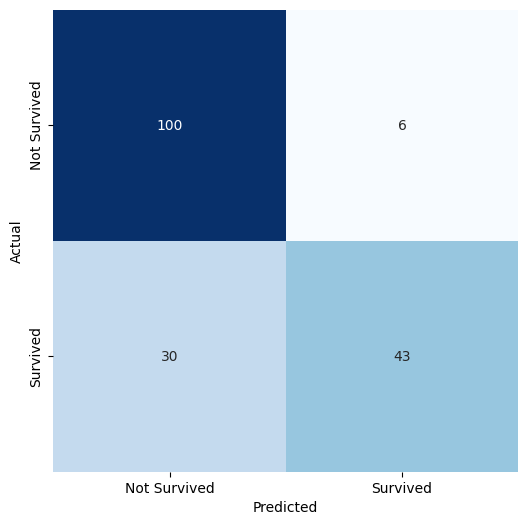

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       106
           1       0.88      0.59      0.70        73

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.79       179



In [69]:
report(y_pred, y_test)

## 8. Тюнинг гиперпараметров модели:

RandomSearchCV

Fitting 4 folds for each of 200 candidates, totalling 800 fits
Best paramters: {'n_estimators': 483, 'max_leaf_nodes': 109, 'max_depth': 400})
Оценка точности модели при подборе параметров с помощью RandomizedSearchCV 0.7932960893854749


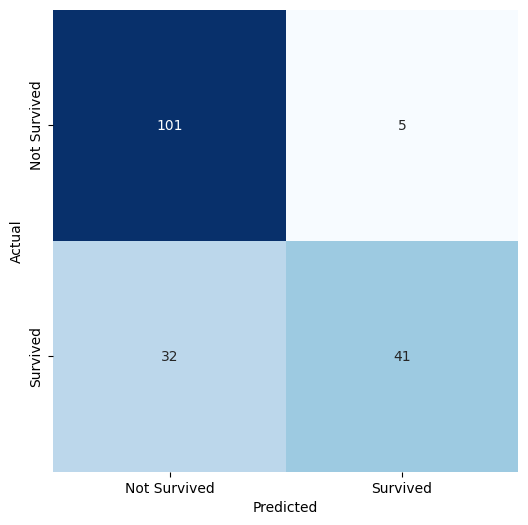

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       106
           1       0.89      0.56      0.69        73

    accuracy                           0.79       179
   macro avg       0.83      0.76      0.77       179
weighted avg       0.81      0.79      0.78       179



In [70]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_estimators = [int(x) for x in np.linspace(start=400, stop=550, num=10)]
max_depth = [int(x) for x in np.linspace(250, 550, num=5)]
max_depth.append(None)
max_leaf_nodes = [int(i) for i in range(50, 120)]

# Определение пространства гиперпараметров
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

# Определение модели классификатора
rf_clf = RandomForestClassifier(random_state=0)

# Определение объекта RandomizedSearchCV
rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=200,
    cv=4,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Обучение модели с перебором гиперпараметров
rf_cv.fit(X_train, y_train)

# Получение оптимальных гиперпараметров
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

# Использование оптимальных гиперпараметров в классификаторе
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(f'Оценка точности модели при подборе параметров с помощью RandomizedSearchCV {accuracy_score(y_test, y_pred)}')

report(y_pred, y_test)

GridSearchCV

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 78, 'max_leaf_nodes': 65, 'min_samples_leaf': 3, 'n_estimators': 365}
Оценка точности модели при подборе параметров с помощью GridSearchCV 0.5921787709497207


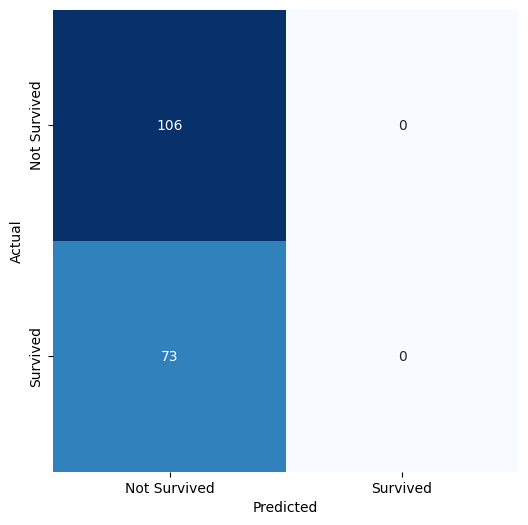

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       106
           1       0.00      0.00      0.00        73

    accuracy                           0.59       179
   macro avg       0.30      0.50      0.37       179
weighted avg       0.35      0.59      0.44       179



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [71]:
from sklearn.model_selection import GridSearchCV

n_estimators = [365]
max_depth = [78, 80, 82]
min_samples_leaf = [3, 4, 5]
max_depth.append(None)
max_leaf_nodes = [65, 70, 75]

params_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'min_samples_leaf': min_samples_leaf
}

rf_clf = RandomForestClassifier(random_state=0)

rf_cv = GridSearchCV(
    rf_clf,
    params_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(f'Оценка точности модели при подборе параметров с помощью GridSearchCV {accuracy_score(y_test, y_pred)}')

report(y_pred, y_test)

## 9. Оценка лучшей модели:

Точность модели при удалении признака Name: **79,88%**

Точность модели без удаления признака Name: **78,77%**

Точность модели при подборе параметров с помощью RandomizedSearchCV с удалением Name: **79,32%**

Точность модели при подборе параметров с помощью GridSearchCV c удалением Name: **79,88%**

Точность модели при подборе параметров с помощью GridSearchCV без удаления Name: **59,21%**

# Задание 2. Решите задачу из предыдущего пункта используя другие, ранее пройденные классификаторы. Сравните их точность предсказания с Random Forest

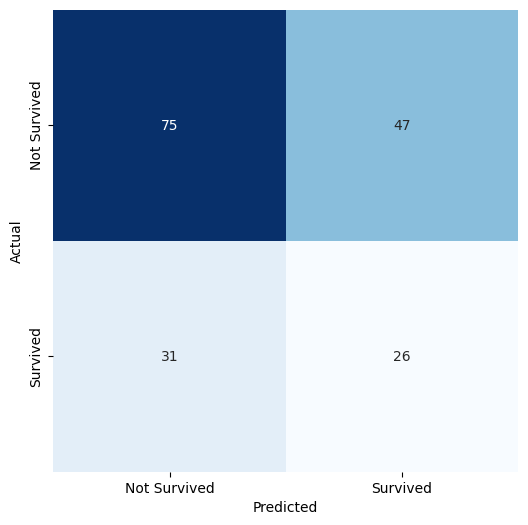

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       122
           1       0.36      0.46      0.40        57

    accuracy                           0.56       179
   macro avg       0.53      0.54      0.53       179
weighted avg       0.60      0.56      0.58       179

Точность KNN: 0.5642458100558659
Точность Random Forest: 0.7988826815642458


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

report(y_test, y_pred_knn)

print(f"Точность KNN: {accuracy_knn}")
print(f"Точность Random Forest: {accuracy}")

# Задание 2.1*. Реализуйте функцию, для взаимодействия с обученной Вами моделью

* Функция должна принимать на вход обученную модель классификатора;

* После вызова функции, у пользователя через консоль запрашиваются значения признаков. При запросе значений нужно вывести пояснения о типе и диапазоне возможных значений. Также реализуйте обработку исключений;

* После ввода значений для всех признаков в консоль, выводится результат работы классификатора.

In [73]:
final_model = RandomForestClassifier(random_state=5, max_depth = 78, max_leaf_nodes = 65, min_samples_leaf = 5, n_estimators = 365)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.5921787709497207


In [92]:
def deadoralive(final_model, X_train):
    feature_info = {
        'Pclass': {'prompt': "Enter your class (1/2/3): ", 'type': int},
        'Sex_male': {'prompt': "Enter your gender (0 for female, 1 for male): ", 'type': int},
        'Age': {'prompt': "Enter your age as a number: ", 'type': float},
        'SibSp': {'prompt': "Enter the number of siblings/spouses aboard: ", 'type': int},
        'Parch': {'prompt': "Enter the number of parents/children aboard: ", 'type': int},
        'Fare': {'prompt': "Enter the fare as a number: ", 'type': float}
    }

    feature_values = {}

    for feature, info in feature_info.items():
        while True:
            try:
                value = info['type'](input(info['prompt']).strip())
                if feature == 'Sex_male' and value not in [0, 1]:
                    raise ValueError("Please enter '0' for 'female' or '1' for 'male'.")
                elif feature == 'Pclass' and value not in [1, 2, 3]:
                    raise ValueError("Please enter '1' or '2' or '3'.")
                break
            except ValueError as e:
                print(f"Error: {e}")

        feature_values[feature] = value

    prediction_features = pd.DataFrame([feature_values], columns=X_train.columns)

    prediction_features.fillna(X_train.median(), inplace=True)
    
    prediction = final_model.predict(prediction_features)

    if prediction[0] == 1:
        print("You survived on the Titanic!")
    else:
        print("You did not survive on the Titanic.")

deadoralive(final_model, X_train)


You did not survive on the Titanic.


# Задание 3. Решите задачу регрессии, используя [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

* Для выполнения данного задания можете использовать **любой датасет**



In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузим датасет "California Housing Prices":
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.data
target = california_housing.target

# Разделим данные на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# Создадим и обучим модель RandomForestRegressor:
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(X_train, y_train)

# Предскажем значения на тестовой выборке и оценим производительность модели:
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.2541538021454274
R-squared (R2) Score: 0.8062395545467909
